# Lab 6 : Language modelling (Ngram model)

## Recap 

* Language models offer a way to assign a probability to a sentence or other sequence of words, and to predict a word from preceding words.

* n-grams are Markov models that estimate words from a fixed window of previous words. n-gram probabilities can be estimated by counting in a corpus and normalizing (the maximum likelihood estimate)

* n-gram language models are evaluated extrinsically in some task, or intrinsically using perplexity

### A language model learns to predict the probability of a sequence of words.
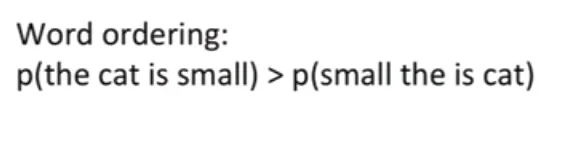

## Types of Language Models
There are primarily two types of Language Models:

1. Statistical Language Models: These models use traditional statistical techniques like N-grams, Hidden Markov Models (HMM) and certain linguistic rules to learn the probability distribution of words
2. Neural Language Models: These use different kinds of Neural Networks to model language

## Today we will build a statistical one.

### An N-gram is a sequence of N tokens (or words).

Let’s understand N-gram with an example. Consider the following sentence:

“I love reading blogs about data science on Analytics Vidhya.”

A 1-gram (or unigram) is a one-word sequence. For the above sentence, the unigrams would simply be: “I”, “love”, “reading”, “blogs”, “about”, “data”, “science”, “on”, “Analytics”, “Vidhya”.

A 2-gram (or bigram) is a two-word sequence of words, like “I love”, “love reading”, or “Analytics Vidhya”.



### If we have a good N-gram model, we can predict p(w | h) — what is the probability of seeing the word w given a history of previous words h — where the history contains n-1 words.

Probability of a sentence after applying chain rule:

* $ P(x_0...x_m) = P(x_0) * P(x_1|x_0) * P(x_2|x_0x_1) ... = \prod_0^{m-1}{P(x_i|x_0...x_{i-1})}$

where m -- the sentence length.

N-gram model simplifies this by limiting the preceding text to length N:

* $ P(x_m|x_0...x_{m-1}) \approx P(x_m|x_{m-n}...x_{m-1})$

## Implementation 1

In [1]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to /home/ivan/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [2]:
# code courtesy of https://nlpforhackers.io/language-models/

from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict

# Create a placeholder for model
model = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for sentence in reuters.sents():
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1
 
# Let's transform the counts to probabilities
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

In [3]:
import random

# starting words
text = ["today", "the"]
sentence_finished = False
 
while not sentence_finished:
  # select a random probability threshold  
  r = random.random()
  accumulator = .0

  for word in model[tuple(text[-2:])].keys():
      accumulator += model[tuple(text[-2:])][word]
      # select words that are above the probability threshold
      if accumulator >= r:
          text.append(word)
          break

  if text[-2:] == [None, None]:
      sentence_finished = True
 
print (' '.join([t for t in text if t]))

today the pound had weathered that period .


## Implementation 2

In [6]:

# imports
import string
import random
import nltk
from nltk import ngrams
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('reuters')
from nltk.corpus import reuters
from nltk import FreqDist
from nltk.corpus import *  
# input the reuters sentences
sents  =reuters.sents()
  
# write the removal characters such as : Stopwords and punctuation
stop_words = set(nltk.corpus.stopwords.words('english'))
string.punctuation = string.punctuation +'"'+'"'+'-'+'''+'''+'—'
string.punctuation
removal_list = list(stop_words) + list(string.punctuation)+ ['lt','rt']
removal_list
  
# generate unigrams bigrams trigrams
unigram=[]
bigram=[]
trigram=[]
tokenized_text=[]
for sentence in sents:
  sentence = list(map(lambda x:x.lower(),sentence))
  for word in sentence:
        if word== '.':
            sentence.remove(word) 
        else:
            unigram.append(word)
    
  tokenized_text.append(sentence)
  bigram.extend(list(ngrams(sentence, 2,pad_left=True, pad_right=True)))
  trigram.extend(list(ngrams(sentence, 3, pad_left=True, pad_right=True)))
  
# remove the n-grams with removable words
def remove_stopwords(x):     
    y = []
    for pair in x:
        count = 0
        for word in pair:
            if word in removal_list:
                count = count or 0
            else:
                count = count or 1
        if (count==1):
            y.append(pair)
    return (y)
unigram = remove_stopwords(unigram)
bigram = remove_stopwords(bigram)
trigram = remove_stopwords(trigram)
  
# generate frequency of n-grams 
freq_bi = FreqDist(bigram)
freq_tri = FreqDist(trigram)
  
d = defaultdict(Counter)
for a, b, c in freq_tri:
    if(a != None and b!= None and c!= None):
      d[a, b][c] += freq_tri[a, b, c]
        

# Next word prediction      
s=''
def pick_word(counter):
    "Chooses a random element."
    return random.choice(list(counter.elements()))
prefix = "he", "said"
print(" ".join(prefix))
s = " ".join(prefix)
for i in range(19):
    suffix = pick_word(d[prefix])
    s=s+' '+suffix
    print(s)
    prefix = prefix[1], suffix

[nltk_data] Downloading package punkt to /home/ivan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ivan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to /home/ivan/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


he said
he said there
he said there has
he said there has also
he said there has also suggested
he said there has also suggested that
he said there has also suggested that prices
he said there has also suggested that prices for
he said there has also suggested that prices for west
he said there has also suggested that prices for west texas
he said there has also suggested that prices for west texas sour
he said there has also suggested that prices for west texas sour was
he said there has also suggested that prices for west texas sour was also
he said there has also suggested that prices for west texas sour was also a
he said there has also suggested that prices for west texas sour was also a chance
he said there has also suggested that prices for west texas sour was also a chance to
he said there has also suggested that prices for west texas sour was also a chance to clinch
he said there has also suggested that prices for west texas sour was also a chance to clinch a
he said there has

## Are these implementations identical?

your answer:   
This methods look the same, but the first implementation uses trigrams to generate a language model and stores the probabilities of each word given the previous two words in a defaultdict. It then uses this model to generate new text by selecting words based on their probabilities given the previous two words. The model uses padding to account for the beginning and end of sentences.

The second implementation generates trigrams and removes stop words and punctuation using a removal list. It then generates frequency distributions for the trigrams and stores them in a defaultdict. It uses the defaultdict to generate new text by selecting a random next word based on the current prefix. 

# What are the limitations of N-gram approach to Language Modeling?

your answer:
1. The sparsity problem: In practice, the number of possible n-grams grows exponentially with n, leading to a sparsity problem. This means that many possible n-grams will have zero counts in the training data, making it difficult to accurately estimate probabilities for them.

2. The fixed context problem: N-grams are based on the assumption that the probability of a word depends only on the previous n-1 words. However, in reality, the probability of a word may depend on a much larger context, including the topic of the document, the genre, or even the speaker's mood. N-grams cannot capture these larger context dependencies.

3. The out-of-vocabulary problem: N-gram models can only estimate probabilities for n-grams that appear in the training data. However, new words that were not seen in the training data will not be represented in the model, leading to the out-of-vocabulary problem. This can be especially problematic for rare words or proper nouns.

4. The lack of generalization: N-gram models are specific to the domain and style of the training data. Thus, they may not generalize well to other domains or styles, leading to poor performance when applied to new data.

5. The inability to handle long-range dependencies: N-grams can only capture dependencies within a fixed context size. However, in many cases, the probability of a word may depend on words that are far away in the text. N-grams cannot capture such long-range dependencies.

# How sparce the model would become when increasing N by M times? Is this dependency linear or exponential?

your answer:
When increasing N by M times, the model would become exponentially sparser.

The number of possible n-grams increases exponentially with the length of the n-gram, and the frequency of n-grams decreases rapidly as the length of the n-gram increases. Therefore, as N increases, the number of possible n-grams increases exponentially, but the frequency of each n-gram decreases exponentially as well. This results in a sparse matrix, where most of the cells are zero.

# Can Laplace smoothing help with this problem?

your answer:  
Yes, Laplace smoothing can help with the sparsity problem in language modeling caused by increasing the value of N.

Laplace smoothing, also known as additive smoothing, is a technique used to estimate the probability of unseen n-grams in a language model. It adds a small constant value (usually 1) to the count of each n-gram, so that the probability of any n-gram is non-zero, even if it does not occur in the training data. This helps to reduce the sparsity of the model and makes it more robust to unseen data.

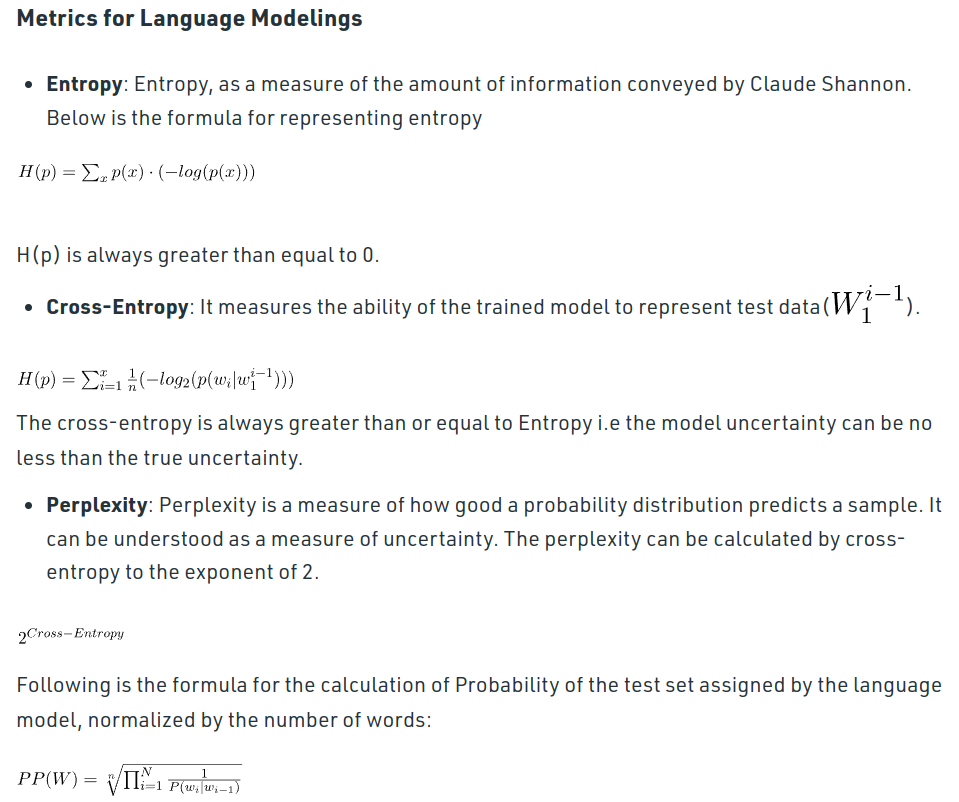

## References

https://web.stanford.edu/~jurafsky/slp3/3.pdf

https://medium.com/analytics-vidhya/a-comprehensive-guide-to-build-your-own-language-model-in-python-5141b3917d6d

https://www.geeksforgeeks.org/n-gram-language-modelling-with-nltk/